**Importing Libraries**

In [ ]:
!pip install optuna
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00


**Loading DataSets**

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/Overall Dataset.csv')

**Data Visualizations**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1761 non-null   int64  
 1   Cell_Line                   1761 non-null   object 
 2   Drug_Name                   1761 non-null   object 
 3   Pubchem_CID                 1761 non-null   object 
 4   #stars                      1761 non-null   int64  
 5   #amine                      1761 non-null   int64  
 6   #amidine                    1761 non-null   int64  
 7   #acid                       1761 non-null   int64  
 8   #amide                      1761 non-null   int64  
 9   #rotor                      1761 non-null   int64  
 10  #rtvFG                      1761 non-null   int64  
 11  CNS                         1761 non-null   int64  
 12  mol_MW                      1761 non-null   float64
 13  dipole                      1761 

In [ ]:
df1.isnull().sum()

S.No                          0
Cell_Line                     0
Drug_Name                     0
Pubchem_CID                   0
#stars                        0
#amine                        0
#amidine                      0
#acid                         0
#amide                        0
#rotor                        0
#rtvFG                        0
CNS                           0
mol_MW                        0
dipole                        0
SASA                          0
FOSA                          0
FISA                          0
PISA                          0
WPSA                          0
volume                        0
donorHB                       0
accptHB                       0
dip^2/V                       0
ACxDN^.5/SA                   0
glob                          0
QPpolrz                       0
QPlogPC16                     0
QPlogPoct                     0
QPlogPw                       0
QPlogPo/w                     0
QPlogS                        0
CIQPlogS

In [ ]:
Ll = LabelEncoder()
df1['Labels'] = Ll.fit_transform(df1['Labels'])

In [ ]:
print("Labels",df1['Labels'].unique())
print(Ll.inverse_transform(list(df1['Labels'].unique())))
print()


Labels [0 1]
['Active' 'Inactive']



In [ ]:
df1 = df1.drop('S.No', axis=1)
df1 = df1.drop('Drug_Name',axis=1)
df1 = df1.drop('Pubchem_CID',axis=1)

In [ ]:
df1 = df1.drop('Cell_Line',axis=1)

In [ ]:
df1.head(5)

,#stars,#amine,#amidine,#acid,#amide,#rotor,#rtvFG,CNS,mol_MW,dipole,...,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,RuleOfThree,Jm,Labels
0,0,0,0,0,0,4,0,-2,263.200,10.474,...,7,0,11,0,11,4,18,0,0.038,0
1,0,0,0,0,0,4,0,-2,392.410,10.243,...,7,0,21,0,21,3,29,0,0.002,0
2,1,1,0,0,0,1,1,-1,279.255,9.083,...,9,0,15,0,15,4,20,0,0.022,0
3,7,0,0,0,0,13,3,-2,807.890,8.913,...,15,2,29,4,22,13,58,2,0.000,0
4,7,3,0,0,0,8,1,1,810.986,1.491,...,13,3,38,0,34,18,59,1,0.000,0


In [ ]:
X = df1.drop('Labels', axis=1)
y = df1['Labels']

In [ ]:
columns = df1.columns.unique()
print(columns)

Index(['#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG',
       'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA',
       'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob',
       'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS',
       'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp',
       'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
       'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
       'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
       'RuleOfThree', 'Jm', 'Labels'],
      dtype='object')


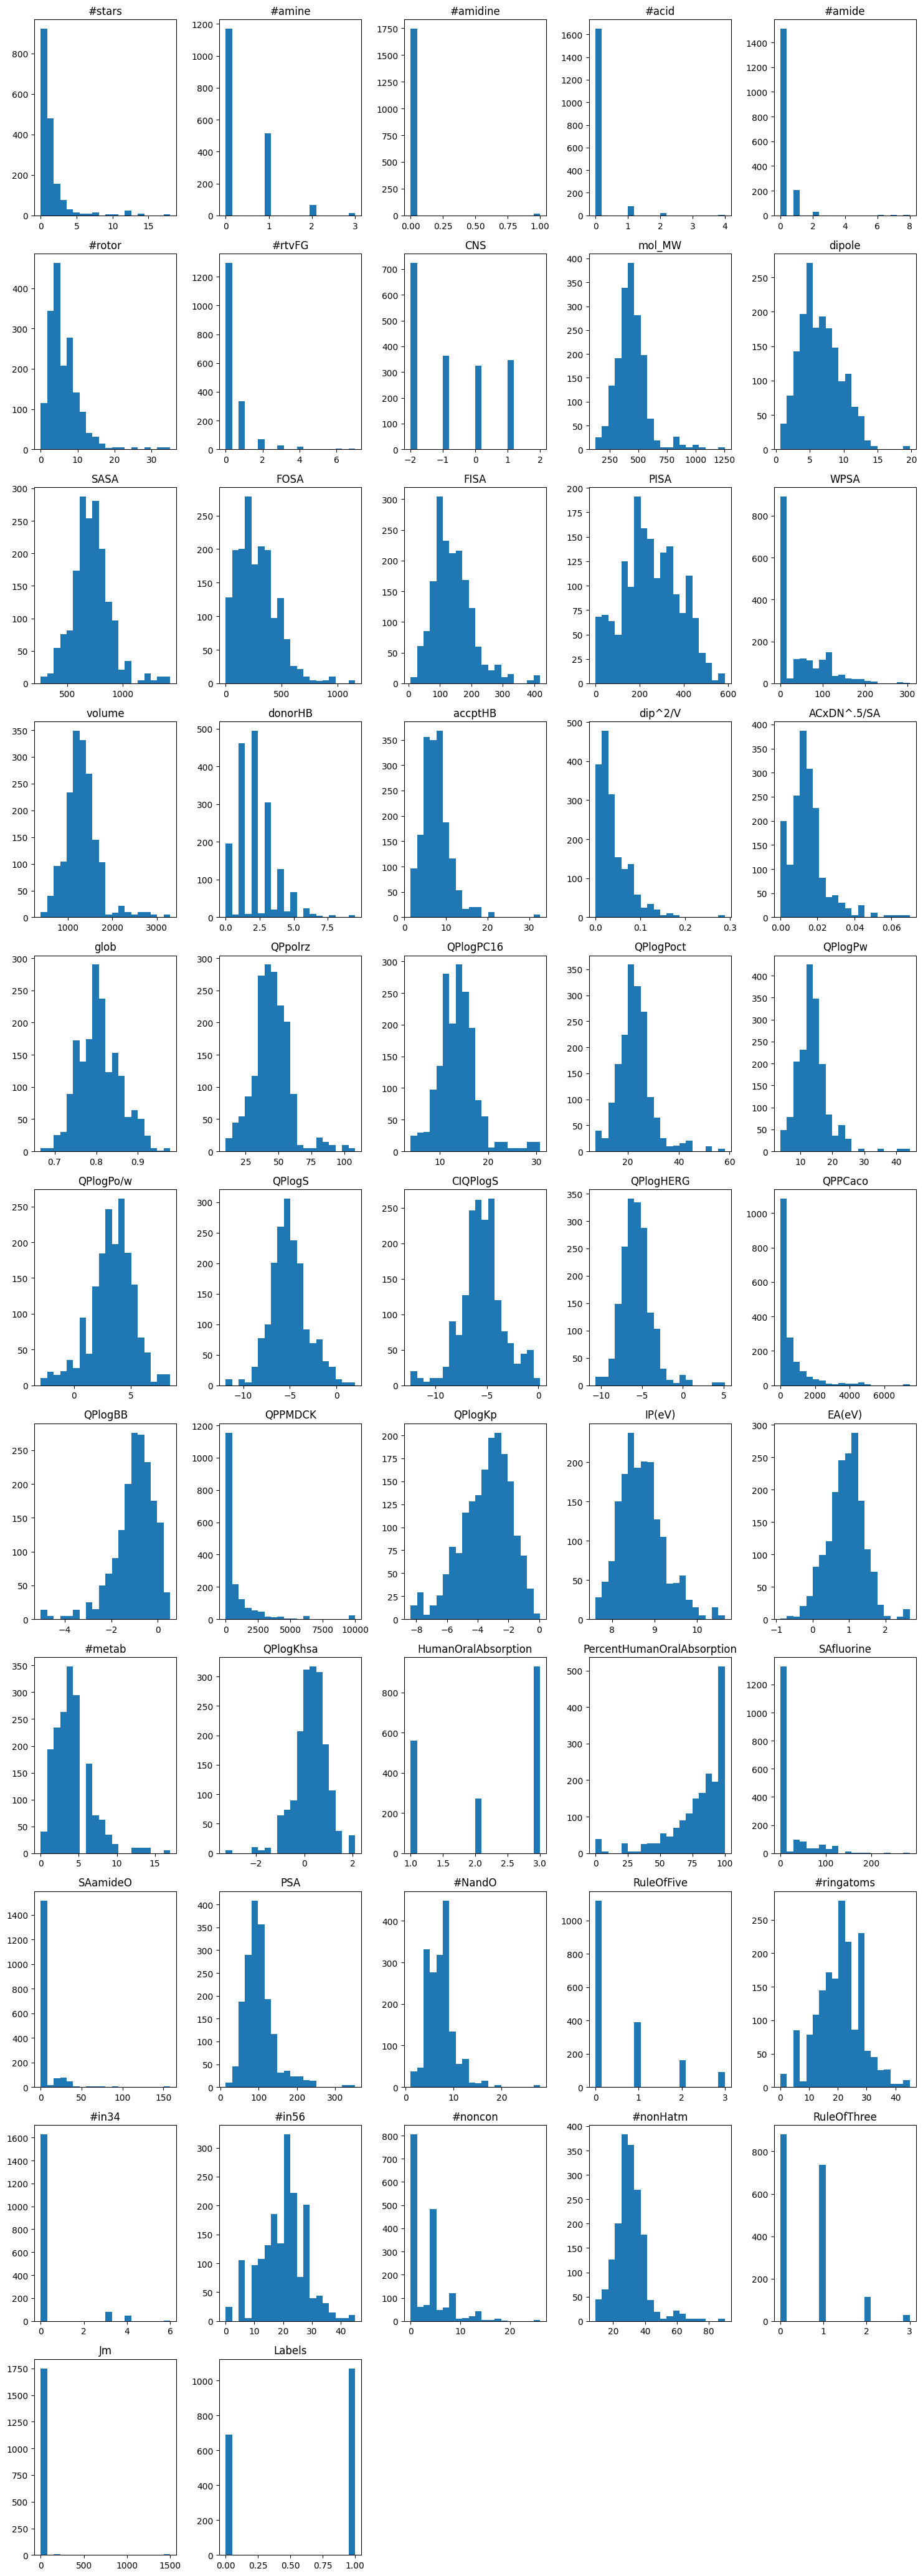

In [ ]:
import matplotlib.pyplot as plt

columns_to_plot = df1.columns

num_rows = 16
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 60))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].hist(df1[col], bins=20)
    axes[i].set_title(col)

# Remove empty subplots
for i in range(len(columns_to_plot), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

outliers = df1.apply(find_outliers_iqr)

In [ ]:
outliers

,#stars,#amine,#amidine,#acid,#amide,#rotor,#rtvFG,CNS,mol_MW,dipole,...,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,RuleOfThree,Jm,Labels
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,True,False,...,True,False,False,True,False,True,True,False,False,False
4,True,True,False,False,False,False,False,False,True,False,...,False,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1757,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1758,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1759,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False


In [ ]:
for col in df1.columns:
    outlier_mask = outliers[col]
    median = df1[col].median()
    df1.loc[outlier_mask, col] = median


In [ ]:
new_summary_statistics = df1.describe()
new_summary_statistics

,#stars,#amine,#amidine,#acid,#amide,#rotor,#rtvFG,CNS,mol_MW,dipole,...,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,RuleOfThree,Jm,Labels
count,1761.000000,1761.000000,1761.0,1761.0,1761.0,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,...,1761.000000,1761.000000,1761.000000,1761.0,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.450312,0.363998,0.0,0.0,0.0,5.636002,0.272005,-0.830778,421.016797,6.562233,...,7.109029,0.403748,20.316865,0.0,19.959114,2.803521,29.923339,0.565588,0.005183,0.607609
std,0.652749,0.551690,0.0,0.0,0.0,3.141518,0.530175,1.166671,97.271574,2.864697,...,2.265987,0.650147,7.316357,0.0,6.832620,2.999433,6.617498,0.613612,0.009971,0.488422
min,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-2.000000,163.191000,0.675000,...,2.000000,0.000000,0.000000,0.0,5.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,0.0,3.000000,0.000000,-2.000000,362.421000,4.453000,...,6.000000,0.000000,15.000000,0.0,15.000000,0.000000,26.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.0,0.0,0.0,5.000000,0.000000,-1.000000,432.377000,6.223000,...,7.000000,0.000000,21.000000,0.0,21.000000,3.000000,30.000000,1.000000,0.002000,1.000000
75%,1.000000,1.000000,0.0,0.0,0.0,7.000000,0.000000,0.000000,481.507000,8.533000,...,9.000000,1.000000,25.000000,0.0,24.000000,5.000000,34.000000,1.000000,0.004000,1.000000
max,2.000000,2.000000,0.0,0.0,0.0,15.000000,2.000000,2.000000,700.787000,14.183000,...,13.000000,2.000000,40.000000,0.0,37.000000,12.000000,46.000000,2.000000,0.051000,1.000000


**Applying SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train = X_train_resampled
y_train = y_train_resampled


**Feature Selection Processes**

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_classif
from scipy.stats import kendalltau

# ANOVA Feature Selection
f_scores, p_values = f_classif(X, y)

anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'P-Value': p_values})

anova_results = anova_results.sort_values(by='F-Score', ascending=False)

print("Top features based on ANOVA:")
print(anova_results.head(10))

# Kendall Correlation Feature Selection
kendall_corr = []
for feature in X.columns:
    corr, _ = kendalltau(X[feature], y)
    kendall_corr.append(corr)

kendall_results = pd.DataFrame({'Feature': X.columns, 'Kendall Correlation': kendall_corr})

kendall_results = kendall_results.sort_values(by='Kendall Correlation', ascending=False)

print("\nTop features based on Kendall Correlation:")
print(kendall_results.head(10))


Top features based on ANOVA:
      Feature    F-Score       P-Value
6      #rtvFG  74.379675  1.413530e-17
17    accptHB  74.238925  1.513610e-17
8      mol_MW  70.476580  9.446538e-17
48   #nonHatm  68.018017  3.134240e-16
42     #NandO  67.056301  5.013455e-16
23  QPlogPoct  58.970980  2.637776e-14
15     volume  56.730071  7.947445e-14
41        PSA  48.954324  3.710511e-12
10       SASA  45.005431  2.640592e-11
21    QPpolrz  43.699347  5.061931e-11

Top features based on Kendall Correlation:
                       Feature  Kendall Correlation
3                        #acid             0.094513
27                    CIQPlogS             0.078043
30                     QPlogBB             0.068073
2                     #amidine             0.067447
33                      IP(eV)             0.060062
31                     QPPMDCK             0.059555
20                        glob             0.052159
28                   QPlogHERG             0.052094
38  PercentHumanOralAbsorption

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier(random_state=42)

model.fit(X_train_resampled, y_train_resampled)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 10 important features
top_10_features = feature_importance_df.head(10)
print(top_10_features)


      Feature  Importance
23  QPlogPoct    0.039707
9      dipole    0.036123
41        PSA    0.036000
18    dip^2/V    0.035356
20       glob    0.031021
33     IP(eV)    0.029755
17    accptHB    0.029674
24    QPlogPw    0.029610
42     #NandO    0.028900
13       PISA    0.028049


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)

model_lr.fit(X_train_resampled, y_train_resampled)

feature_importances_lr = model_lr.coef_[0]

# DataFrame to hold the feature names and their importances
feature_importance_df_lr = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_lr})

feature_importance_df_lr = feature_importance_df_lr.sort_values(by='Importance', ascending=False)

top_10_features_lr = feature_importance_df_lr.head(10)

print(top_10_features_lr)


       Feature  Importance
40    SAamideO    0.021643
46       #in56    0.010154
44  #ringatoms    0.009271
12        FISA    0.008482
0       #stars    0.007883
47     #noncon    0.007675
33      IP(eV)    0.004887
14        WPSA    0.003959
15      volume    0.003845
10        SASA    0.003747


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train_resampled, y_train_resampled)

feature_importances_dt = model_dt.feature_importances_

feature_importance_df_dt = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_dt})

feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

top_10_features_dt = feature_importance_df_dt.head(10)

print(top_10_features_dt)

      Feature  Importance
42     #NandO    0.105618
36  QPlogKhsa    0.090229
26     QPlogS    0.072567
20       glob    0.050974
33     IP(eV)    0.046113
21    QPpolrz    0.044925
41        PSA    0.036997
5      #rotor    0.035260
11       FOSA    0.035126
27   CIQPlogS    0.034090


In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42)

model_xgb.fit(X_train_resampled, y_train_resampled)

feature_importances_xgb = model_xgb.feature_importances_

feature_importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb})

feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

top_10_features_xgb = feature_importance_df_xgb.head(10)

print(top_10_features_xgb)


      Feature  Importance
42     #NandO    0.086539
48   #nonHatm    0.059453
23  QPlogPoct    0.044821
6      #rtvFG    0.041977
35     #metab    0.036827
26     QPlogS    0.030291
46      #in56    0.029217
22  QPlogPC16    0.028481
36  QPlogKhsa    0.027218
21    QPpolrz    0.026064


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)
model_adaboost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

model_adaboost.fit(X_train_resampled, y_train_resampled)

# Feature importances
feature_importances_adaboost = model_adaboost.feature_importances_

# DataFrame to hold the feature names and their importances
feature_importance_df_adaboost = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_adaboost})

feature_importance_df_adaboost = feature_importance_df_adaboost.sort_values(by='Importance', ascending=False)

# Top 10 important features
top_10_features_adaboost = feature_importance_df_adaboost.head(10)

print(top_10_features_adaboost)


    Feature  Importance
50       Jm        0.06
20     glob        0.06
16  donorHB        0.06
8    mol_MW        0.06
34   EA(eV)        0.04
30  QPlogBB        0.04
21  QPpolrz        0.04
31  QPPMDCK        0.04
18  dip^2/V        0.04
14     WPSA        0.04


# Model Building

**Random Forest**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

y_pred_proba = rf_classifier.predict_proba(X_test)[:,1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc}')

#Specificity
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]

specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')

Accuracy: 0.7599243856332704
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       212
           1       0.81      0.78      0.80       317

    accuracy                           0.76       529
   macro avg       0.75      0.75      0.75       529
weighted avg       0.76      0.76      0.76       529

Accuracy: 0.7599243856332704
Precision: 0.8104575163398693
Recall: 0.7823343848580442
Confusion Matrix:
[[154  58]
 [ 69 248]]
F1 Score: 0.796147672552167
AUC Score: 0.8447413844414022
Specificity: 0.7264150943396226


**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Predict
y_pred_lr = lr_classifier.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy (Logistic Regression): {accuracy_lr}')

# Calculate precision
precision_lr = precision_score(y_test, y_pred_lr)
print(f'Precision (Logistic Regression): {precision_lr}')

# Calculate recall
recall_lr = recall_score(y_test, y_pred_lr)
print(f'Recall (Logistic Regression): {recall_lr}')

# Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(f'Confusion Matrix (Logistic Regression):\n{conf_matrix_lr}')

# Calculate F1-score
f1_lr = f1_score(y_test, y_pred_lr)
print(f'F1 Score (Logistic Regression): {f1_lr}')

y_pred_proba_lr = lr_classifier.predict_proba(X_test)[:,1]

# Calculate AUC score
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f'AUC Score (Logistic Regression): {auc_lr}')

# Calculate Specificity
TN_lr = conf_matrix_lr[0, 0]
FP_lr = conf_matrix_lr[0, 1]
specificity_lr = TN_lr / (TN_lr + FP_lr)
print(f'Specificity (Logistic Regression): {specificity_lr}')

Accuracy (Logistic Regression): 0.6515580736543909
Precision (Logistic Regression): 0.6690140845070423
Recall (Logistic Regression): 0.867579908675799
Confusion Matrix (Logistic Regression):
[[ 40  94]
 [ 29 190]]
F1 Score (Logistic Regression): 0.7554671968190855
AUC Score (Logistic Regression): 0.6500204457166224
Specificity (Logistic Regression): 0.29850746268656714


**naive_bayes**

Accuracy: 0.59
Precision: 0.66
Recall: 0.65
F1-Measure: 0.66
AUC value: 0.63


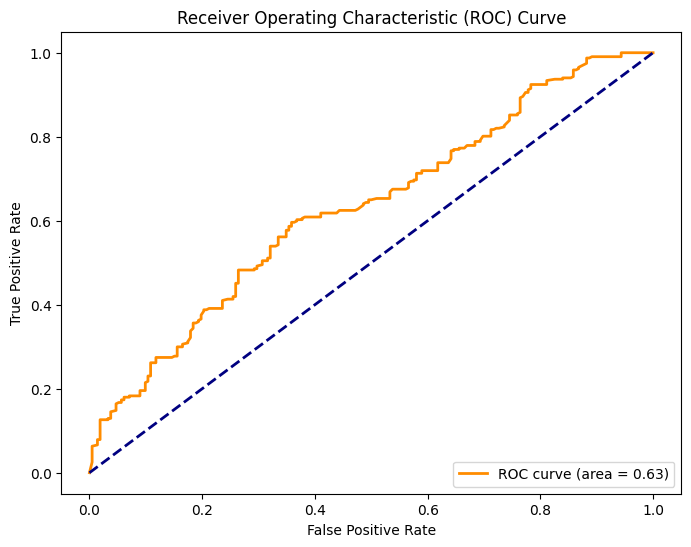

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

predictions_nb = naive_bayes_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, predictions_nb)
print(f"Accuracy: {accuracy_nb:.2f}")

precision_nb = precision_score(y_test, predictions_nb)
print(f"Precision: {precision_nb:.2f}")

recall_nb = recall_score(y_test, predictions_nb)
print(f"Recall: {recall_nb:.2f}")

f1_nb = f1_score(y_test, predictions_nb)
print(f"F1-Measure: {f1_nb:.2f}")

auc_value_nb = roc_auc_score(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value_nb:.2f}")

fpr_nb, tpr_nb, _ = roc_curve(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**knn_model**

Accuracy: 0.74
Precision: 0.78
Recall: 0.80
F1-Measure: 0.79
AUC value: 0.79


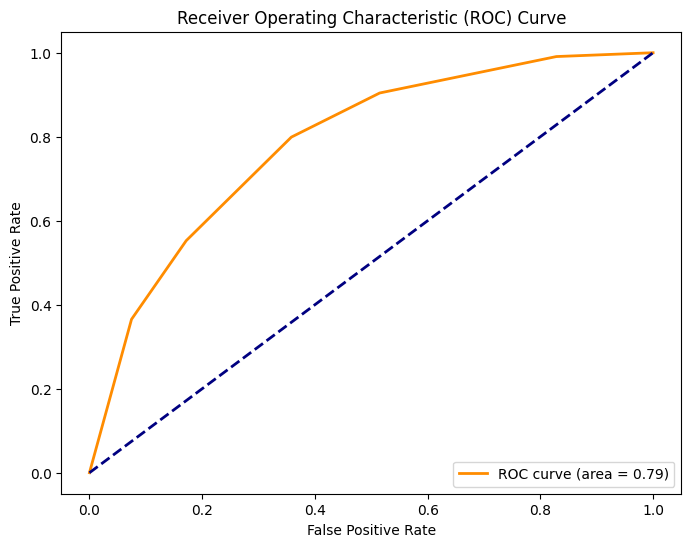

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

predictions_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

precision_knn = precision_score(y_test, predictions_knn)
print(f"Precision: {precision_knn:.2f}")

recall_knn = recall_score(y_test, predictions_knn)
print(f"Recall: {recall_knn:.2f}")

f1_knn = f1_score(y_test, predictions_knn)
print(f"F1-Measure: {f1_knn:.2f}")

auc_value_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value_knn:.2f}")

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**svm_model**

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1-Measure: 0.77
AUC value: 0.65


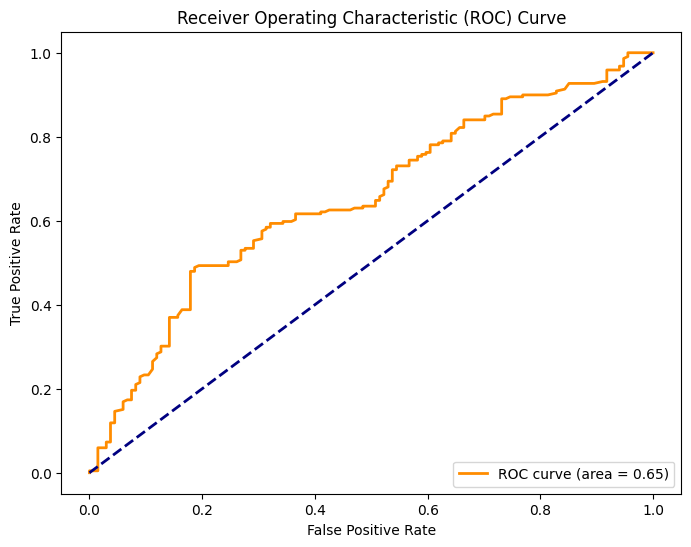

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
svm_model = SVC(probability=True)

svm_model.fit(X_train, y_train)

predictions_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

precision_svm = precision_score(y_test, predictions_svm)
print(f"Precision: {precision_svm:.2f}")

recall_svm = recall_score(y_test, predictions_svm)
print(f"Recall: {recall_svm:.2f}")

f1_svm = f1_score(y_test, predictions_svm)
print(f"F1-Measure: {f1_svm:.2f}")

auc_value_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value_svm:.2f}")

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy (Decision Tree): {accuracy_dt}')

# Calculate precision
precision_dt = precision_score(y_test, y_pred_dt)
print(f'Precision (Decision Tree): {precision_dt}')

# Calculate recall
recall_dt = recall_score(y_test, y_pred_dt)
print(f'Recall (Decision Tree): {recall_dt}')

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix (Decision Tree):\n{conf_matrix_dt}')

# Calculate F1-score
f1_dt = f1_score(y_test, y_pred_dt)
print(f'F1 Score (Decision Tree): {f1_dt}')

y_pred_proba_dt = dt_classifier.predict_proba(X_test)[:,1]

# Calculate AUC score
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f'AUC Score (Decision Tree): {auc_dt}')

# Calculate Specificity
TN_dt = conf_matrix_dt[0, 0]
FP_dt = conf_matrix_dt[0, 1]
specificity_dt = TN_dt / (TN_dt + FP_dt)
print(f'Specificity (Decision Tree): {specificity_dt}')

Accuracy (Decision Tree): 0.7712665406427222
Precision (Decision Tree): 0.8402777777777778
Recall (Decision Tree): 0.7634069400630915
Confusion Matrix (Decision Tree):
[[166  46]
 [ 75 242]]
F1 Score (Decision Tree): 0.8
AUC Score (Decision Tree): 0.8297943574787214
Specificity (Decision Tree): 0.7830188679245284


**XG Booster**

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict using XGBoost
y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy (XGBoost): {accuracy_xgb}')

precision_xgb = precision_score(y_test, y_pred_xgb)
print(f'Precision (XGBoost): {precision_xgb}')

recall_xgb = recall_score(y_test, y_pred_xgb)
print(f'Recall (XGBoost): {recall_xgb}')

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f'Confusion Matrix (XGBoost):\n{conf_matrix_xgb}')

# Calculate F1-score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f'F1 Score (XGBoost): {f1_xgb}')

y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:,1]

# Calculate AUC score
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f'AUC Score (XGBoost): {auc_xgb}')

# Calculate Specificity
TN_xgb = conf_matrix_xgb[0, 0]
FP_xgb = conf_matrix_xgb[0, 1]
specificity_xgb = TN_xgb / (TN_xgb + FP_xgb)
print(f'Specificity (XGBoost): {specificity_xgb}')

Accuracy (XGBoost): 0.7674858223062382
Precision (XGBoost): 0.803125
Recall (XGBoost): 0.8107255520504731
Confusion Matrix (XGBoost):
[[149  63]
 [ 60 257]]
F1 Score (XGBoost): 0.8069073783359497
AUC Score (XGBoost): 0.8437741801083269
Specificity (XGBoost): 0.7028301886792453


**Adabooster**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)

y_pred_ada = ada_classifier.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy (AdaBoost): {accuracy_ada}')

precision_ada = precision_score(y_test, y_pred_ada)
print(f'Precision (AdaBoost): {precision_ada}')

recall_ada = recall_score(y_test, y_pred_ada)
print(f'Recall (AdaBoost): {recall_ada}')

conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print(f'Confusion Matrix (AdaBoost):\n{conf_matrix_ada}')

f1_ada = f1_score(y_test, y_pred_ada)
print(f'F1 Score (AdaBoost): {f1_ada}')

y_pred_proba_ada = ada_classifier.predict_proba(X_test)[:,1]

auc_ada = roc_auc_score(y_test, y_pred_proba_ada)
print(f'AUC Score (AdaBoost): {auc_ada}')

TN_ada = conf_matrix_ada[0, 0]
FP_ada = conf_matrix_ada[0, 1]
specificity_ada = TN_ada / (TN_ada + FP_ada)
print(f'Specificity (AdaBoost): {specificity_ada}')


Accuracy (AdaBoost): 0.7391304347826086
Precision (AdaBoost): 0.7934426229508197
Recall (AdaBoost): 0.7634069400630915
Confusion Matrix (AdaBoost):
[[149  63]
 [ 75 242]]
F1 Score (AdaBoost): 0.7781350482315113
AUC Score (AdaBoost): 0.7875721683233141
Specificity (AdaBoost): 0.7028301886792453


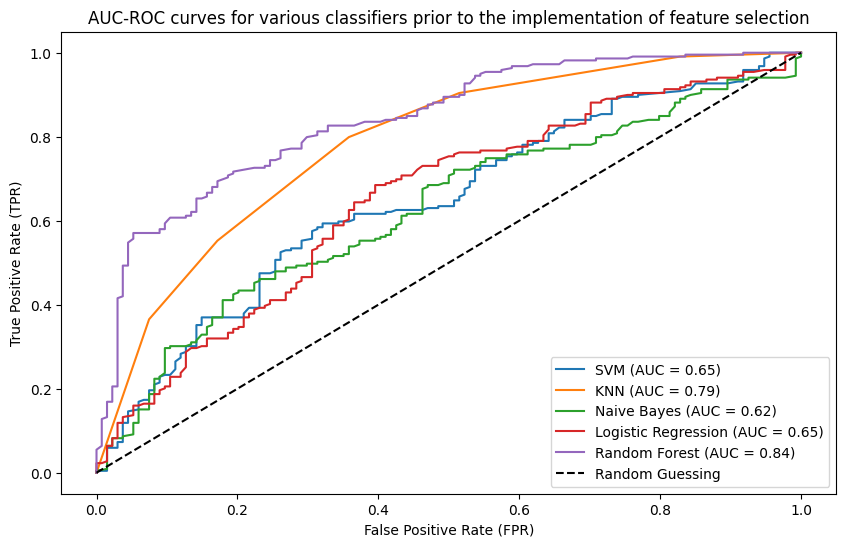

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=57, max_depth=14, random_state=42)
}

plt.figure(figsize=(10, 6))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC curves for various classifiers prior to the implementation of feature selection')
plt.legend(loc='lower right')
plt.show()
